# Exercise 3

## 1. Implementation of Stochastic Gradient Descent


In [364]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
np.random.seed(24)

In [365]:
def SGD (x, y, w_init,max_iter,error):
    w_upd = w_init
    difference = 1
    k=0

    while k<max_iter and (abs(np.linalg.norm(difference))>error or k==0):
        
        i =random.randint(0, x.shape[0]-1)

        w_old = w_upd
    
        eps = 1/(i+1)**0.6


        w_upd = w_old + eps*2*(y[i] - np.dot(w_old, x[i])) * x[i]
        

        if np.linalg.norm(w_upd)>1: w_upd = w_upd/np.linalg.norm(w_upd)

        difference = w_upd - w_old
        k=k+1
    
        
    return w_upd

## 2. Sampling Observations
We will make a sample of 10000 points in the $[0,1]^2$ square in $\mathbb{R}^2$. We chose the hyperplane with normal vector $(1,-1)$.

In [366]:
def sample_n_points (n):
    x = np.random.rand(n, 2) 
    w_true = np.array([1,-1])
    y = [1 if np.dot(w_true,x[i])>=0 else -1 for i in range(x.shape[0])]   
    return x,y

In [367]:
x,y = sample_n_points (10000)

In [368]:

def scatter_plot(x,y):
    data = pd.DataFrame({"X_1": x[:,0], "X_2": x[:,1], "Category": y})

    groups = data.groupby("Category")
    for name, group in groups:
        plt.plot(group["X_1"], group["X_2"], marker="o", linestyle="", label=name, markersize=2)
    plt.legend()
    plt.show()

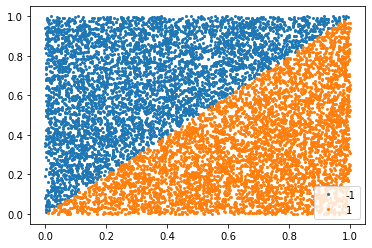

In [369]:
scatter_plot(x,y)

## 3.Estimating $\omega$ with the SGD algorithm.

In [370]:
# Init vector randomly and normalize
w_init = np.random.rand(x.shape[1])*2-1
w_init=w_init/np.linalg.norm(w_init)
w_init

array([0.75818645, 0.65203781])

For the same set from Q2, we try the SGD algorithm with different values of n, that is, for different maximum iterations of the algorithm and plot the distance from the real value of $\omega$ found in each case.

In [371]:
w_story= []
w_true = np.array([1,-1])

for n in range(1000, 200000, 10000):
    w_found = SGD(x, y, w_init, n, 0.000001)
    w_story.append([n , np.linalg.norm(w_found-w_true)])



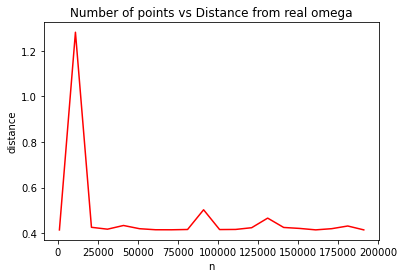

In [372]:
w_story = np.array(w_story)
plt.title("Number of points vs Distance from real omega")
plt.xlabel("n")
plt.ylabel("distance")
plt.plot(w_story[:,0],w_story[:,1], color ="red")
plt.show()

## 4. Observations with Gaussian noise.

In [373]:
noise = np.array(np.random.normal(0,0.5,2*x.shape[0]))
noise.shape=(x.shape[0],2)
print(noise)
x_with_noise = x + noise

[[ 0.51011667  0.18766339]
 [-0.48540212 -0.80385573]
 [-0.18961567  0.6402421 ]
 ...
 [ 0.50185132  0.65737656]
 [ 0.67507228 -1.21223825]
 [-0.04618992  0.05363885]]


Plot of the new dataset

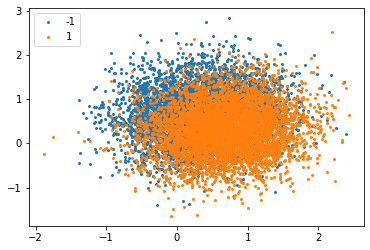

In [374]:
scatter_plot(x_with_noise,y)

We proceed as in Q3, finding $\omega$ for different values of n.

In [377]:
w_story= []

for n in range(100, 200001, 10000):
    w_found = SGD(x_with_noise, y, w_init, n+10000, 0.000001)
    w_story.append([n , np.linalg.norm(w_found-w_true)])


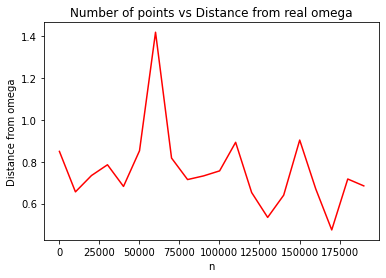

In [378]:
w_story = np.array(w_story)
plt.title("Number of points vs Distance from real omega")
plt.xlabel("n")
plt.ylabel("Distance from omega")
plt.plot(w_story[:,0],w_story[:,1], color ="red")
plt.show()

We observe that the behaviour is a bit worse for this dataset.

## 5. Breast Cancer Wisconsin Data Set

In [350]:
#We read and clean the data
data = pd.read_csv('breast-cancer-wisconsin.data',header=None)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [351]:
#We scale the values of the features 

x_cancer = data[data.columns[[1,2,3,4,5,6,7,8,9]]].to_numpy()
from sklearn.preprocessing import Normalizer 
scaler = Normalizer().fit(x_cancer)
x_cancer =  scaler.transform(x_cancer)

y_cancer = data.iloc[:,10].values
y_cancer = np.where(y_cancer==2,-1,1)

In [352]:
#We split the set into a training and a testing set with a 75-25 ratio
from sklearn.model_selection import train_test_split

x_cancer_train, x_cancer_test, y_cancer_train, y_cancer_test = train_test_split(x_cancer,y_cancer,random_state=0)

In [353]:
# Init vector randomly and normalize
w_init_cancer = np.random.rand(x_cancer_train.shape[1])*10
w_init_cancer=w_init_cancer/np.linalg.norm(w_init)
w_init_cancer

array([8.69561612, 7.2511913 , 3.15684818, 7.47822371, 2.18339091,
       6.48272072, 9.30531899, 1.06377606, 2.18948966])

In [360]:
w_found = SGD(x_cancer_train, y_cancer_train, w_init_cancer, 1000, 0.000001)
w_found

array([-0.35491156,  0.30717394,  0.11964207,  0.13647464, -0.58959384,
        0.57735112, -0.20945995,  0.04256546, -0.14178116])

In [361]:
y_pred=np.where(x_cancer_test.dot(w_found)>0,1,-1)

behavior = y_pred*y_cancer_test

right = (behavior >0).sum()
wrong = (behavior <0).sum()

percentage = right/(right+wrong)



We find that the percentage of correct predictions is the 80.5%

In [362]:
percentage

0.8342857142857143